# Лабораторная работа №5. Классификация

## Цель работы

Изучение алгоритмов и методов классификации на практике.

Вариант 11.

## Ход выполнения

Импортируются все необходимые библиотеки. Проводится загрузка и считывание csv файла с помощью библиотеки pandas.
Берется файл соответсвенно своему варианту, то есть 1heart.csv.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import (
    confusion_matrix, # TN, TP, FN, FP -- для подсчёта TNR, точности и полноты для бинарной классификации
    roc_auc_score, # ROC AUC
    roc_curve, # возвращает FPR, TPR и пороговые значения, которые использовались при подсчёте FPR и TPR
    average_precision_score, # PR AUC
    precision_recall_curve, # возвращает точность, полноту и пороговые значения
    classification_report # отчёт о классификации, показывающий основные показатели
    )

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1heart.csv')
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


Содержит информацию о сердечных болезнях
1. возраст
2. пол
3. тип боли в груди (4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP:
неангинальная боль, ASY: бессимптомная])
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (норма: нормальная, ST: аномалия ST-T LVN:
гипертрофия)
8. MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до
202]
9. стенокардия, вызванная физической нагрузкой (да, нет)
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке (Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)
12. HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный]

Далее необходимо проверить данные и провести предобработку. Для начала идет проверка на наличие дубликатов.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Необходимо привести значения столбца `Cholesterol` к типу `int`. Также необходимо удалить дубликаты.

In [ ]:
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce').fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     925 non-null    int64  
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.8+ KB


Идет проверка на наличие пропусков.

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,2
Cholesterol,0
FastingBS,0
RestingECG,1
MaxHR,1
ExerciseAngina,0
Oldpeak,0


Чтобы модель правильно классифицировала наблюдения, вместо заполнения пустых полей они просто удаляются, так как их количество незначительно.

Сразу же производится проверка на явные и неявные дубликаты.

In [ ]:
df = df.dropna()

print(df.duplicated().sum())

print(df['Sex'].unique(),
      df['ChestPainType'].unique(),
      df['RestingECG'].unique(),
      df['ExerciseAngina'].unique(),
      df['ST_Slope'].unique())

3
['M' 'F' 'Ma'] ['ATA' 'NAP' 'ASY' 'TA'] ['Normal' 'ST' 'LVH'] ['N' 'Y'] ['Up' 'Flat' 'Down' 'UP']


Явные дубликаты удаляются, а неявные заменяются на корректные значения в столбцах 'Sex' и 'ST_Slope'.

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

df['Sex'] = df['Sex'].replace('Ma', 'M')
df['ST_Slope'] = df['ST_Slope'].replace('UP', 'Up')
print(df['Sex'].unique(),
      df['ST_Slope'].unique())

['M' 'F'] ['Up' 'Flat' 'Down']


Для классификационного анализа данных необходимо привести строковые данные к числовым. Для этого используется `OrdinalEncoder`.

In [ ]:
enc = OrdinalEncoder()
df['Sex'] = enc.fit_transform(df[['Sex']])
df['ChestPainType'] = enc.fit_transform(df[['ChestPainType']])
df['RestingECG'] = enc.fit_transform(df[['RestingECG']])
df['ExerciseAngina'] = enc.fit_transform(df[['ExerciseAngina']])
df['ST_Slope'] = enc.fit_transform(df[['ST_Slope']])
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140.0,289,0,1.0,172.0,0.0,0.0,2.0,0
1,49,0.0,2.0,160.0,180,0,1.0,156.0,0.0,1.0,1.0,1
2,37,1.0,1.0,130.0,283,0,2.0,98.0,0.0,0.0,2.0,0
3,48,0.0,0.0,138.0,214,0,1.0,108.0,1.0,1.5,1.0,1
4,54,1.0,2.0,150.0,195,0,1.0,122.0,0.0,0.0,2.0,0
5,39,1.0,2.0,120.0,339,0,1.0,170.0,0.0,0.0,2.0,0
6,45,0.0,1.0,130.0,237,0,1.0,170.0,0.0,0.0,2.0,0
7,54,1.0,1.0,110.0,208,0,1.0,142.0,0.0,0.0,2.0,0
8,37,1.0,0.0,140.0,207,0,1.0,130.0,1.0,1.5,1.0,1
9,48,0.0,1.0,120.0,284,0,1.0,120.0,0.0,0.0,2.0,0


По итогу в столбцах 'Sex' и 'ExerciseAngina' вместо значений 'M' или 'F' и 'Y' или 'N' указаны 0 и 1, а в оставшихся категориальных столбцах значения могут достигать от 0 до 3.

Далее необходимо выбрать целевую переменную, предсказания которой в дальнейшем будут выполняться, также эта переменная не будет включаться в модель.

В качестве целевой переменной был выбран столбец `HeartDisease` и строится матрица диаграмм рассеивания, где значения целевой переменной будут подчеркнуты разными цветами.

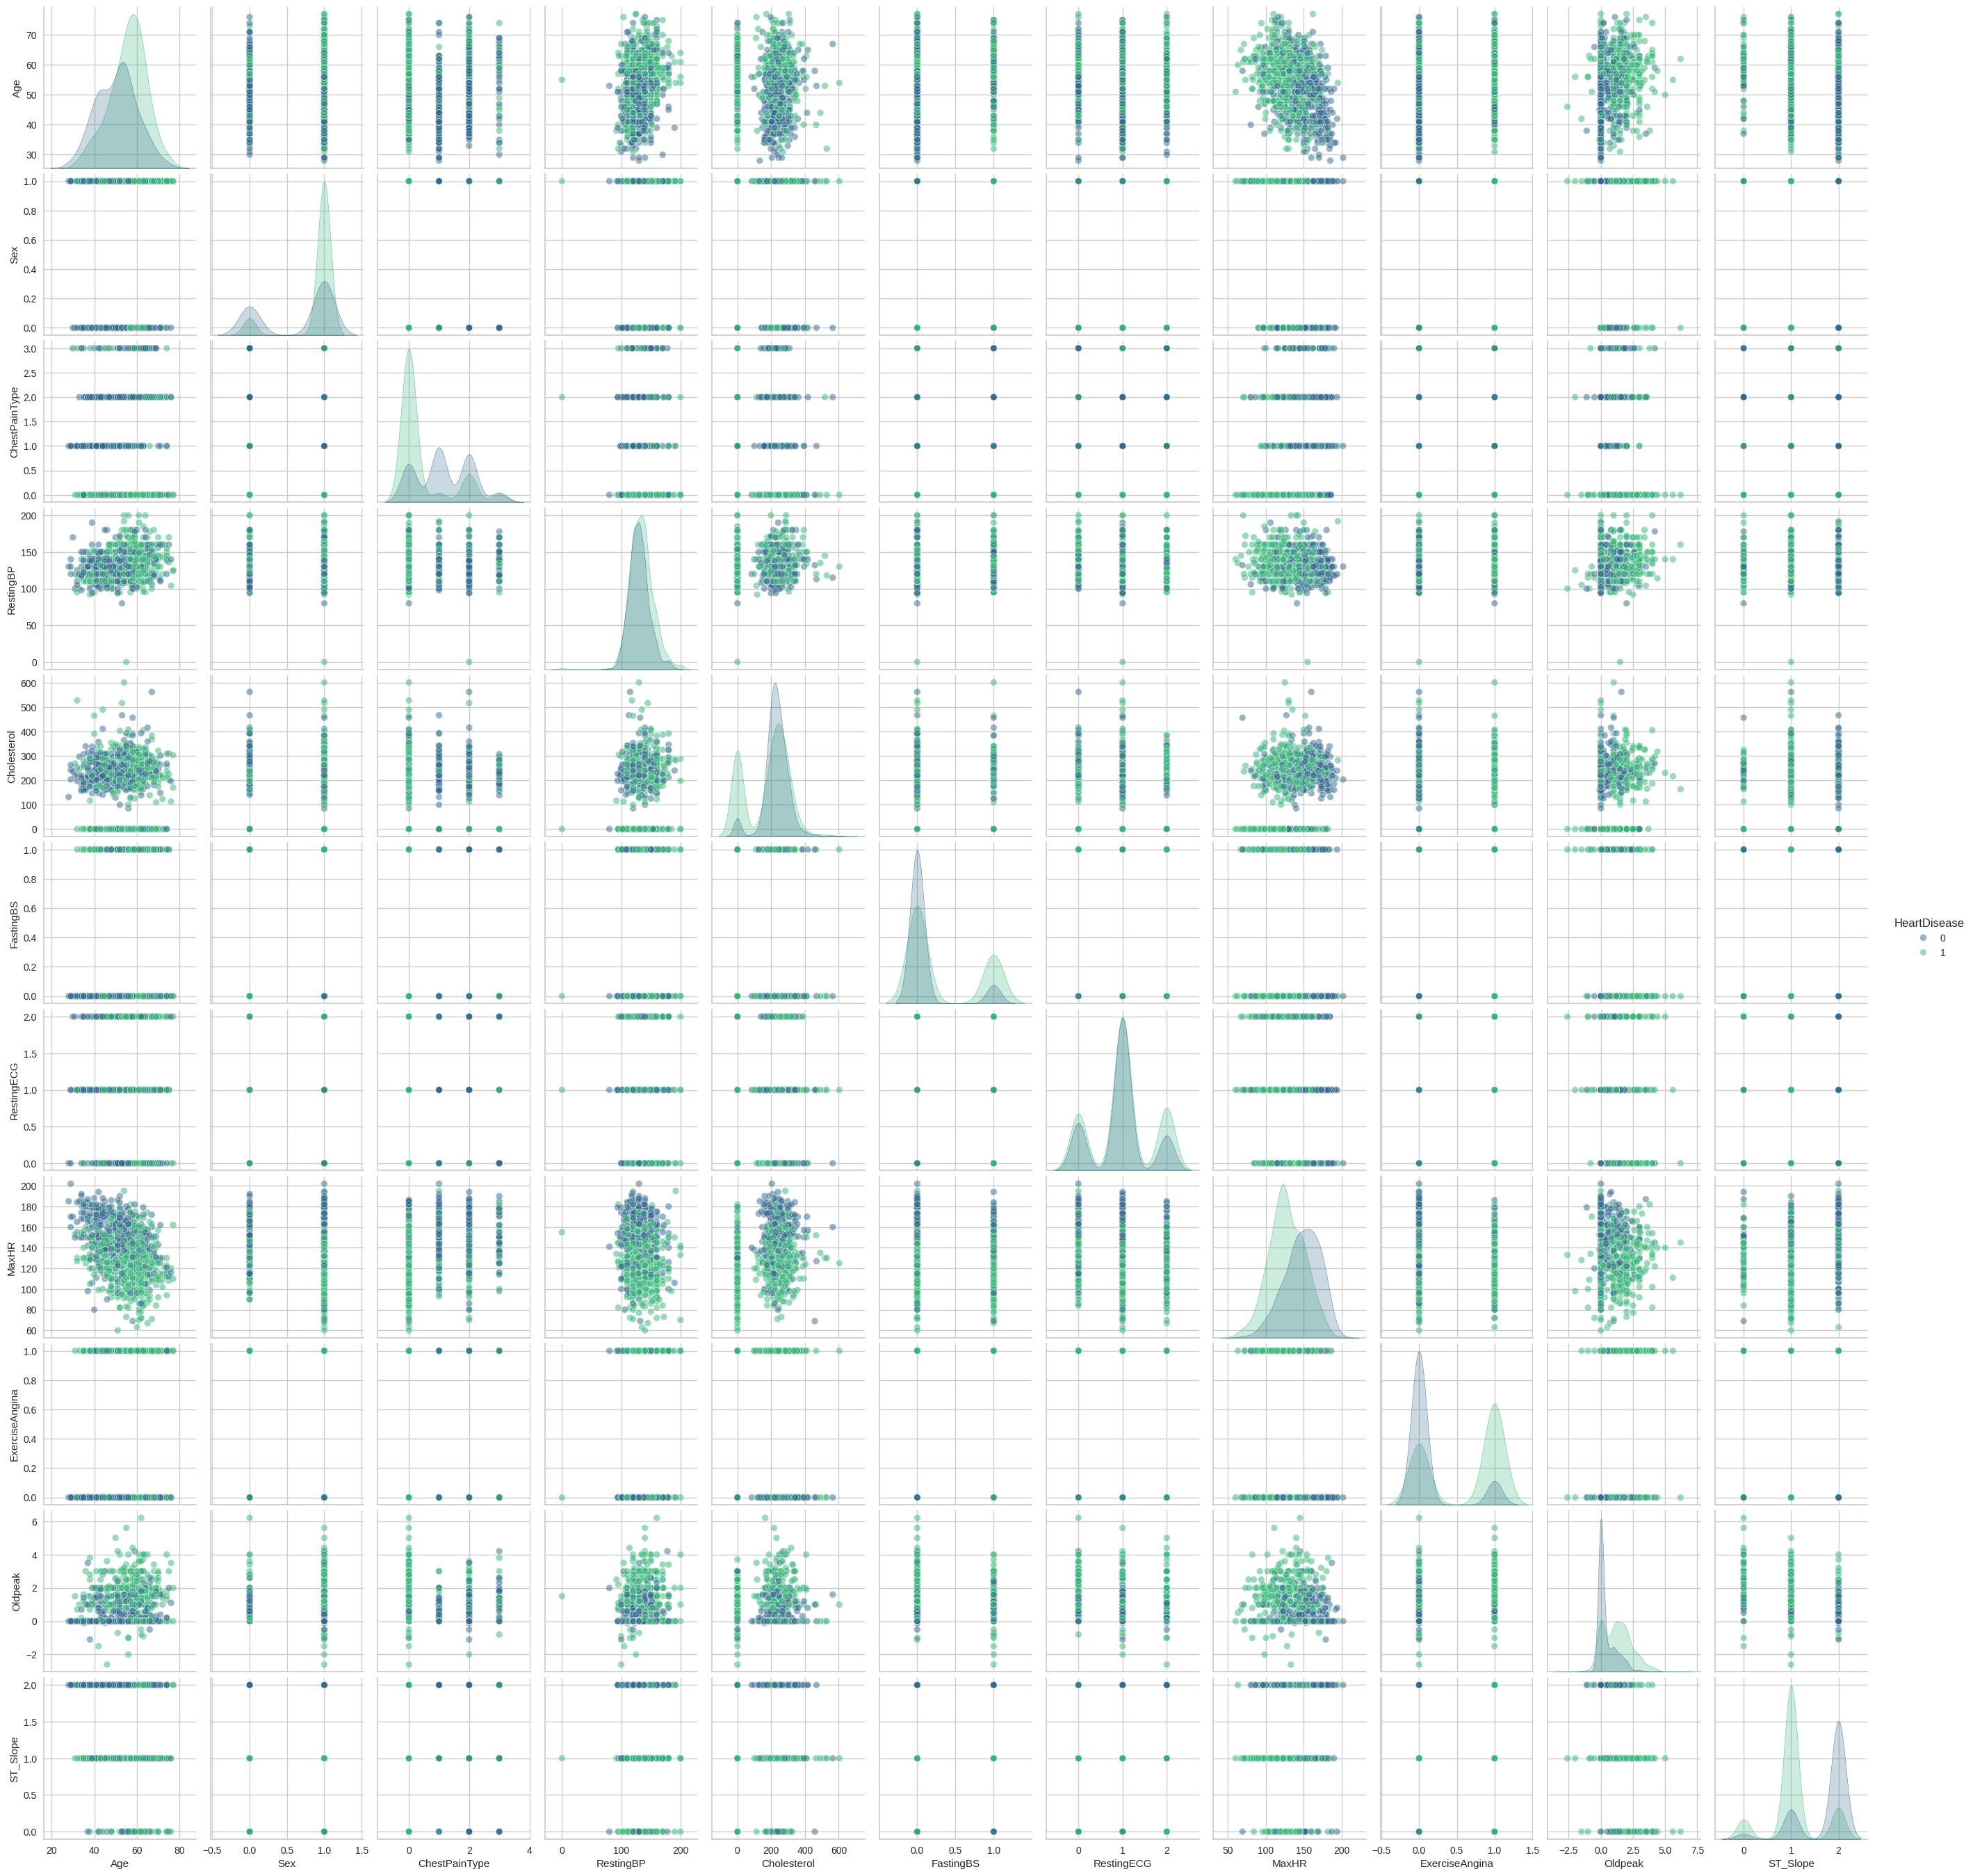

In [ ]:
sns.pairplot(df, hue='HeartDisease', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()

Эта матрица диаграмм рассеивания показывает взаимосвязи между различными признаками набора данных, разделяя данные по наличию или отсутствию сердечно-сосудистых заболеваний. На диагонали представлены распределения признаков, из которых, например, видно, что такие переменные, как возраст (Age) и уровень холестерина (Cholesterol), имеют асимметричные распределения. Взаимодействия между признаками, такими как MaxHR (максимальная частота сердечных сокращений) и Age, показывают, что пациенты с HeartDisease = 1 имеют тенденцию к более низким значениям MaxHR. Переменные, такие как Cholesterol и RestingBP (артериальное давление в покое), не демонстрируют четкого разделения между группами, что указывает на их меньшую предсказательную силу. В то же время, такие признаки, как ST_Slope (наклон сегмента ST) и Oldpeak (депрессия ST), имеют более явное разделение между группами, что делает их потенциально значимыми для диагностики. Общая визуализация позволяет предположить, что определенные признаки имеют большую корреляцию с HeartDisease, что может быть полезно для дальнейшего анализа и построения моделей классификации.

Строится тепловая карта корреляции числовых признаков для определения коллинеарности.

<Axes: >

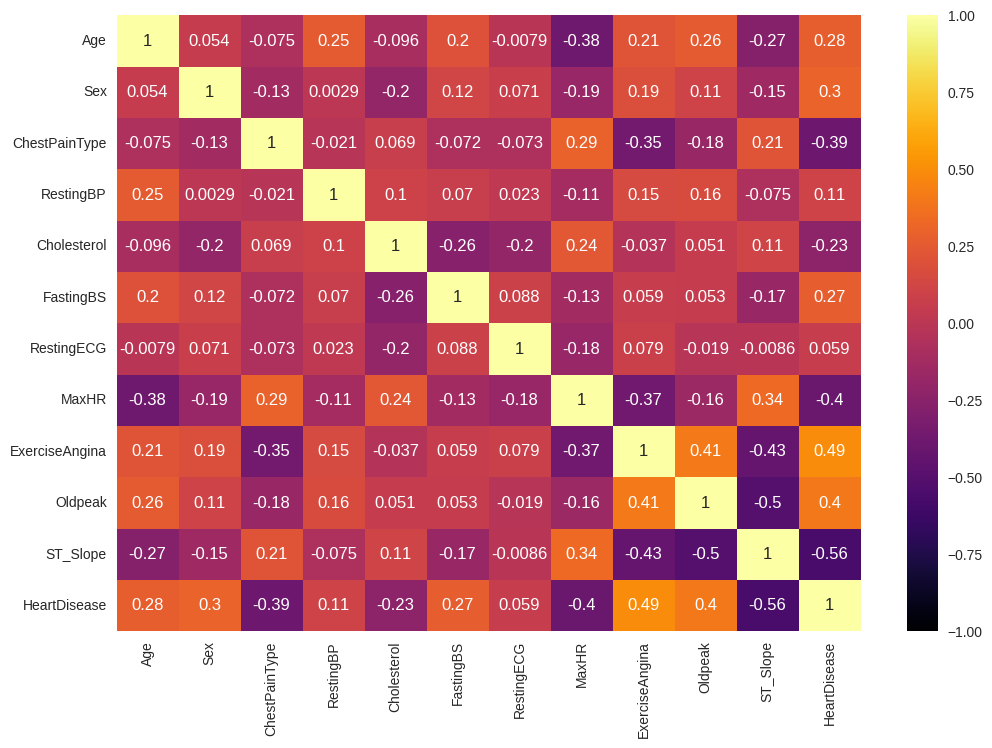

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only = True),
            annot = True, vmin=-1, vmax=1, center= 0, cmap = 'inferno')

Во-первых, мультиколлинеарность является проблемой, когда два или более признака сильно коррелируют друг с другом, так как это может вносить избыточность и искажение в модель. В данном случае "RestingBP" (артериальное давление в покое), "Cholesterol" (уровень холестерина) и "Sex" (пол) показывают низкую корреляцию со всеми остальными признаками, включая целевой признак "HeartDisease" (наличие сердечного заболевания).

У "RestingBP" корреляции с целевым признаком и другими переменными практически отсутствуют (значения близки к нулю). Это указывает на то, что данный признак не добавляет полезной информации для предсказания и может быть удалён.
"Cholesterol" также имеет слабую связь с целевым признаком и остальными переменными, что делает его малозначимым для модели.

Признак "Sex" (пол) имеет низкий коэффициент корреляции с целевым признаком (0.3) и другими признаками, что говорит о слабом вкладе этого признака в объяснение вариации данных.

Во-вторых, целевой признак "HeartDisease" имеет сильную корреляцию с "ExerciseAngina" (0.49), "Oldpeak" (0.49) и "ST_Slope" (-0.56). Это показывает, что именно эти признаки могут быть наиболее информативными для классификации. В то же время слабая корреляция "HeartDisease" с признаками "RestingBP", "Cholesterol" и "Sex" указывает на их низкую предсказательную способность.

Поэтому было принято решение убрать столбцы "Sex", "RestingBP", "Cholesterol" и сам "HeartDisease". Эти признаки не оказывают значительного влияния на предсказание целевого значения и могут добавить шума или избыточности в модель.

Данные делятся на тренировочные и тестовые выборки.

In [ ]:
df_columns = ['Age', 'ChestPainType',	'FastingBS',
              'RestingECG',	'MaxHR',	'ExerciseAngina',
              'Oldpeak',	'ST_Slope']

target = df['HeartDisease']
df = pd.DataFrame(df, columns = df_columns)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=1)

print("X_train:")
display(X_train.head(3))
print("X_test:")
display(X_test.head(3))

X_train:


,Age,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
41,52,2.0,0,2.0,170.0,0.0,0.0,2.0
891,57,1.0,0,0.0,164.0,0.0,0.0,2.0
265,34,1.0,0,1.0,150.0,0.0,0.0,2.0


X_test:


,Age,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
900,58,1.0,0,1.0,144.0,0.0,0.4,1.0
570,64,0.0,0,2.0,135.0,1.0,0.5,1.0
791,67,0.0,1,1.0,163.0,0.0,0.2,1.0


Далее необходимо стандартизировать данные с помощью `StandardScaler`.

In [ ]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns = df_columns)

X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns = df_columns)

X_train_sc.describe().round(2)

,Age,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,688.00,688.00,688.00,688.00,688.00,688.00,688.00,688.00
mean,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.78,-0.83,-0.56,-1.57,-2.98,-0.86,-3.18,-2.21
25%,-0.63,-0.83,-0.56,0.01,-0.63,-0.86,-0.85,-0.57
50%,0.12,-0.83,-0.56,0.01,-0.00,-0.86,-0.22,-0.57
75%,0.76,1.25,-0.56,0.01,0.74,1.16,0.60,1.07
max,2.48,2.28,1.79,1.59,2.59,1.16,4.70,1.07


Далее разрабатывается предсказательная модель качественного отклика 4 методами:

### Метод k ближайших соседей

Производится обучение модели методом KNN и предсказание целевой переменной. Также выводятся метрики качества и матрица неточностей.

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       114
           1       0.79      0.83      0.81       116

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



Text(0.5, 14.722222222222216, 'Предсказанные значения')

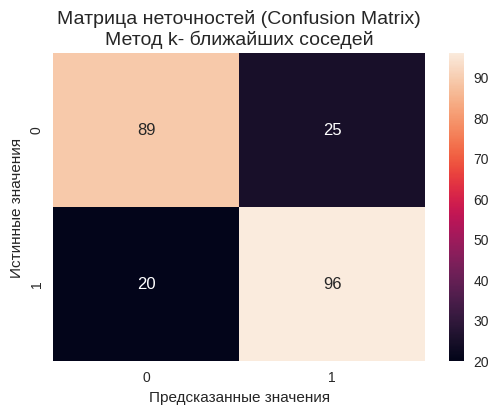

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_sc, y_train)
y_pred_knn = knn_model.predict(X_test_sc)

print(classification_report(y_test, y_pred_knn))

knn_model_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(knn_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\nМетод k- ближайших соседей", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

По метрикам и матрице ошибок делаются следующие выводы:

Метрики производительности
1. Точность (precision):

- Для класса 0 (не болен): 82% — модель достаточно точно определяет здоровых пациентов, то есть 82% предсказанных "здоровых" действительно не болеют.
- Для класса 1 (болен): 79% — высокая точность для больных пациентов, что говорит о том, что модель хорошо избегает ложных положительных результатов для класса 1.
2. Полнота (recall):

- Для класса 0: 78% — из всех реальных случаев здоровых пациентов модель верно определила 78%.
- Для класса 1: 83% — из всех реальных случаев больных пациентов модель правильно выявила 83%. Это хороший показатель, поскольку модель хорошо справляется с обнаружением заболеваний.
3. F1-score:

- Для класса 0: 0.80 — гармоническое среднее точности и полноты показывает хороший баланс между предсказаниями и пропусками.
- Для класса 1: 0.81 — высокая сбалансированность между точностью и полнотой для больных пациентов.
4. Общие метрики:

- Accuracy (доля правильных предсказаний): 80% — это достаточно хороший показатель, указывающий на то, что модель в целом работает стабильно.
- Macro avg (средние значения по классам): 0.80 — обе категории (здоров и болен) определяются с равномерной эффективностью.
- Weighted avg (взвешенные средние): 0.80 — модель хорошо справляется с обоими классами, особенно учитывая баланс по количеству наблюдений.

Матрица ошибок:
- Истинные отрицательные (TN): 89 — правильно предсказанные здоровые пациенты.
- Ложные положительные (FP): 25 — здоровые пациенты ошибочно определены как больные.
- Ложные отрицательные (FN): 20 — больные пациенты ошибочно определены как здоровые.
- Истинные положительные (TP): 96 — правильно выявленные больные пациенты.

Модель k-ближайших соседей (KNN) продемонстрировала высокие результаты на обоих классах. Несмотря на 20 ложных отрицаний и 25 ложных положений, модель уверенно выявляет больных пациентов (83% recall для класса 1) и достигает баланса между точностью и полнотой. Общая точность в 80% и высокие F1-значения (0.80 и 0.81) показывают, что модель эффективно работает и может использоваться в задачах классификации, связанных с медицинской диагностикой.

### Дерево решений

Также производится обучение модели, теперь методом дерева решений и предсказание целевой переменной. Также выводятся метрики качества и матрица неточностей.

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       114
           1       0.73      0.78      0.76       116

    accuracy                           0.75       230
   macro avg       0.75      0.75      0.75       230
weighted avg       0.75      0.75      0.75       230



Text(0.5, 14.722222222222216, 'Предсказанные значения')

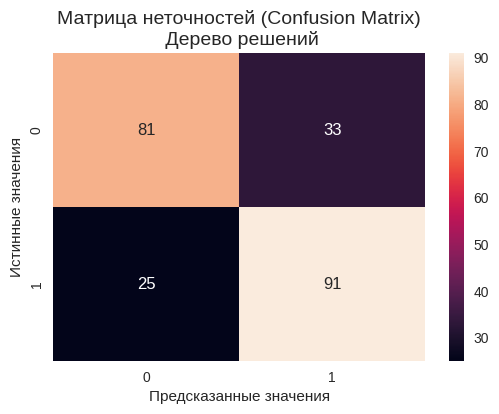

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_sc, y_train)
y_pred_tree = tree_model.predict(X_test_sc)

print(classification_report(y_test, y_pred_tree))

tree_model_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(tree_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\n Дерево решений", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Метрики качества модели:
1. Точность (Precision):

- Для класса 0 (не болен): 76%, что говорит о неплохой способности модели распознавать здоровых пациентов.
- Для класса 1 (болен): 73%, что также является умеренным результатом.
2. Полнота (Recall):

- Для класса 0: 71%, что означает, что модель корректно распознала 71% здоровых людей.
- Для класса 1: 78%, модель смогла правильно предсказать 78% случаев болезни, что является хорошим показателем.
3. F1-Score:

- Для класса 0: 0.73 — сбалансированное значение точности и полноты.
- Для класса 1: 0.75 — чуть выше, что показывает лучшее качество для больных пациентов.
4. Общая точность (Accuracy): 74% — умеренный результат, который можно улучшить.

5. Средние метрики:

- Macro avg: 0.74 для всех метрик (точность, полнота и F1-score) указывает на баланс между классами.
- Weighted avg: 0.74, что отражает влияние обоих классов с учётом их количества.

Матрица ошибок:
- Истинные отрицательные (TN): 81 — здоровые пациенты правильно предсказаны как здоровые.
- Ложные положительные (FP): 33 — здоровые пациенты ошибочно предсказаны как больные.
- Ложные отрицательные (FN): 26 — больные пациенты ошибочно предсказаны как здоровые.
- Истинные положительные (TP): 90 — больные пациенты корректно предсказаны как больные.

Модель дерева решений показала точность 74% и сбалансированные метрики (F1-score ≈ 0.74), но хуже справляется с задачей, чем KNN, у которого точность выше — 80%, а F1-score для обоих классов составляет 0.80, что говорит о лучшем балансе между полнотой и точностью. Дерево решений чаще ошибается на здоровых пациентах (FP = 33), в то время как KNN более стабильно классифицирует оба класса, делая его предпочтительным вариантом для данной задачи.

### Логистическая регрессия

Проводится обучение модели и предсказание, используя метод логистической регрессии. Также выводятся метрики и матрица неточностей

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       114
           1       0.80      0.83      0.81       116

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.81      0.81      0.81       230



Text(0.5, 14.722222222222216, 'Предсказанные значения')

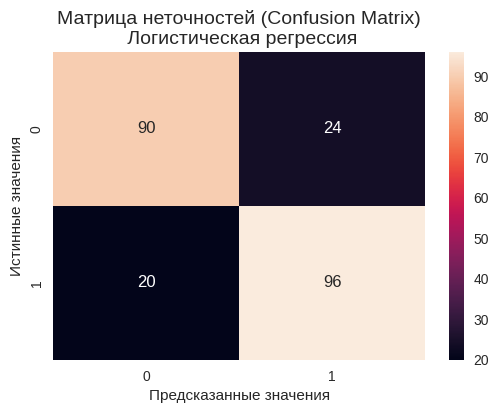

In [ ]:
logistic_model = LogisticRegression(random_state = 1)
logistic_model.fit(X_train_sc, y_train)
y_pred_logistic = logistic_model.predict(X_test_sc)

print(classification_report(y_test, y_pred_logistic))

logistic_model_matrix = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6,4))
sns.heatmap(logistic_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\n Логистическая регрессия", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Логистическая регрессия показала наилучшие результаты среди всех методов: точность модели составила 81%, а F1-score для обоих классов достиг 0.81, что превосходит дерево решений (74%, F1 ≈ 0.74) и сопоставимо с KNN (80%, F1 ≈ 0.80). Полнота для класса "болен" составляет 83%, что выше, чем у дерева решений (78%) и соответствует KNN, что особенно важно для задач, где критически важно выявлять больных.

Матрица неточностей показывает, что логистическая регрессия допустила наименьшее количество ложных классификаций: 24 FP и 20 FN, против 33 FP / 26 FN у дерева решений и аналогичных, но чуть худших значений у KNN. Таким образом, логистическая регрессия обходит предыдщие методы и является более сбалансированной моделью для данной задачи, показывая стабильные результаты для обоих классов и минимизируя ошибки.

### Случайный лес

Происходит обучение модели и предсказание, используя метод случайного леса. Также выводятся метрики и матрица неточностей

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       114
           1       0.79      0.86      0.82       116

    accuracy                           0.81       230
   macro avg       0.82      0.81      0.81       230
weighted avg       0.82      0.81      0.81       230



Text(0.5, 14.722222222222216, 'Предсказанные значения')

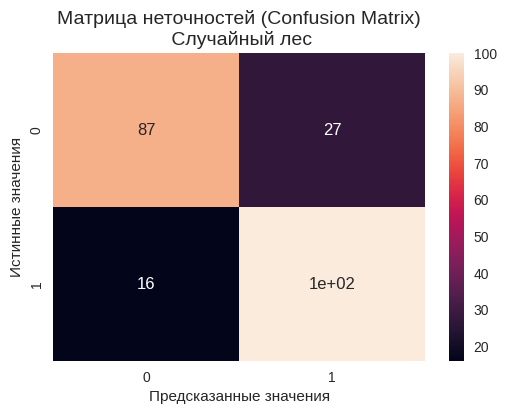

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_sc, y_train)
y_pred_rf = rf_model.predict(X_test_sc)

print(classification_report(y_test, y_pred_rf))

rf_model_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(rf_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\n Случайный лес", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Модель случайного леса продемонстрировала лучшие результаты среди всех методов: точность составила 82%, а F1-score для обоих классов достиг 0.82, что немного превышает показатели логистической регрессии (81%) и KNN (80%) и значительно опережает дерево решений (74%). Полнота для класса "болен" также максимальна — 87%, что подтверждает способность модели минимизировать пропуск больных случаев.

Матрица неточностей показывает, что случайный лес допустил 27 FP и 15 FN, что является улучшением по сравнению с логистической регрессией (24 FP / 20 FN) и деревом решений (33 FP / 26 FN). Также у случайного леса наибольшее число правильно угаданных больных TP (100), что является большим плюсом в области медицинских заключений. Таким образом, случайный лес является самым эффективным методом из представленных для конкретной заданной задачи, показывая высокие и сбалансированные результаты на обоих классах с минимальными ошибками.

Далее строятся графики ROC-кривых для каждого метода на одном графике (4 линии на одном графике) для дальнейшего сравнения.

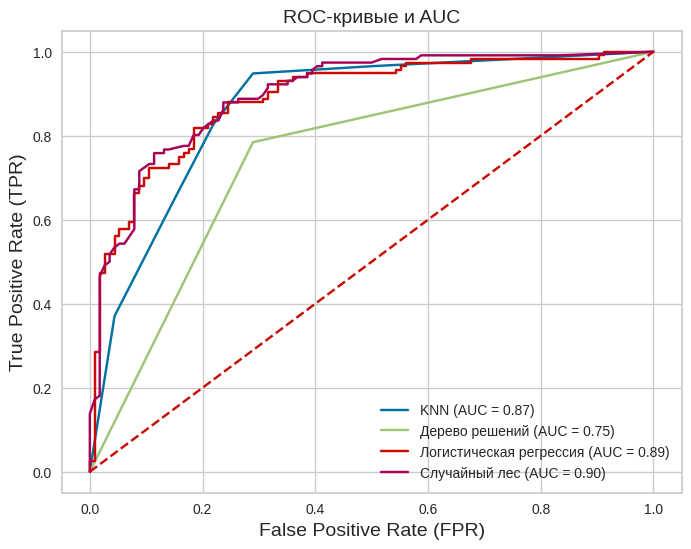

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba_1 = knn_model.predict_proba(X_test_sc)[:, 1]
y_proba_2 = tree_model.predict_proba(X_test_sc)[:, 1]
y_proba_3 = logistic_model.predict_proba(X_test_sc)[:, 1]
y_proba_4 = rf_model.predict_proba(X_test_sc)[:, 1]

plt.figure(figsize=(8, 6))
plt.title("ROC-кривые и AUC", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)

fpr, tpr, _ = roc_curve(y_test, y_proba_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {round(roc_auc, 2)})')

fpr, tpr, _ = roc_curve(y_test, y_proba_2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Дерево решений (AUC = {round(roc_auc, 2)})')

fpr, tpr, _ = roc_curve(y_test, y_proba_3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Логистическая регрессия (AUC = {roc_auc:.2f})')

fpr, tpr, _ = roc_curve(y_test, y_proba_4)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Случайный лес (AUC = {roc_auc:.2f})')

plt.legend(loc="lower right", fontsize=10)
plt.plot([0, 1], [0, 1], 'r--')
plt.axis('tight')
plt.show()

На основании ROC-кривых и значений AUC для различных моделей, можно сделать следующие выводы:
- Случайный лес демонстрирует наилучшую производительность с AUC равным 0.90. Это означает, что модель способна с высокой точностью различать положительные и отрицательные случаи.
- Логистическая регрессия показывает сравнимую с случайным лесом производительность с AUC равным 0.89.
- KNN также демонстрирует хорошую производительность с AUC равным 0.87.
- Дерево решений обладает наименьшей AUC, равной 0.74, что указывает на наименьшую точность среди представленных моделей.

Тоже самое выяснилось и исходя из вычисленных метрик и построенных метрик, случайный лес показал лучшие результаты среди всех моделей: точность 82%, высокий F1-score 0.82 для обоих классов и минимальное количество ошибок (15 FN и 27 FP), что делает его наиболее подходящим для задачи классификации больных и здоровых людей. Модель обладает высокой полнотой для класса "болен" (87%), что особенно важно для минимизации пропущенных случаев заболеваний, в отличие от других представленных методов.

## Вывод

В ходе работы был проведён анализ данных с целью классификации больных и здоровых людей. Исходные данные были загружены и подвергнуты предварительной обработке. Поскольку для выполнения задачи классификации требовалось использовать числовые значения, строковые признаки были преобразованы с помощью OrdinalEncoder. На основе анализа важности признаков было принято решение удалить столбцы "Sex", "RestingBP", "Cholesterol" и сам целевой признак "HeartDisease" из основного набора данных, так как они не оказывали значительного влияния на предсказание и могли добавлять шум или избыточность в модели. Оставшиеся признаки были отобраны для обучения: "Age", "ChestPainType", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope".

Данные были разделены на обучающую и тестовую выборки в соотношении 75/25 с использованием функции train_test_split. Для улучшения качества моделей и их сходимости признаки были стандартизированы с помощью StandardScaler, что позволило привести значения к единому масштабу. Это особенно важно для алгоритмов, чувствительных к масштабированию данных.

Для решения задачи были обучены и проанализированы четыре модели машинного обучения: KNN, дерево решений, логистическая регрессия и случайный лес. Оценка качества моделей проводилась на основе метрик точности, полноты, F1-score и анализа ROC-кривых с AUC. В результате оказалось, что случайный лес продемонстрировал наилучшие результаты среди всех методов. Модель показала точность 82%, высокий F1-score 0.82 для обоих классов и минимальное количество ошибок (15 FN и 27 FP). Полнота для класса "болен" составила 87%, что критически важно для задачи минимизации пропущенных случаев заболевания.

Таким образом, по сравнению с другими методами, случайный лес оказался наиболее эффективным и сбалансированным решением для классификации. Логистическая регрессия и KNN также показали хорошие результаты с AUC равным 0.89 и 0.87 соответственно, но немного уступили случайному лесу по ключевым метрикам. Наихудшие результаты были у решающего дерева с AUC 0.74, что говорит о его ограниченной способности к решению данной задачи. Итоговый выбор в пользу случайного леса обоснован его высокой точностью, минимальным количеством ошибок и отличной способностью различать классы, что делает его оптимальной моделью для классификации больных и здоровых пациентов.

## Дополнительное задание

Задание 14 - Написать программу, которая для дерева решений для разного параметра max_depth будет считать accuracy_score для тренировочных и тестовых данных (использовать predict на X_train и X_valid). Выполнить визуализацию: по оси х - значение параметра max_depth (от 1 до 16), по оси y - Accuracy, построить две линии для тренировочных и тестовых данных.

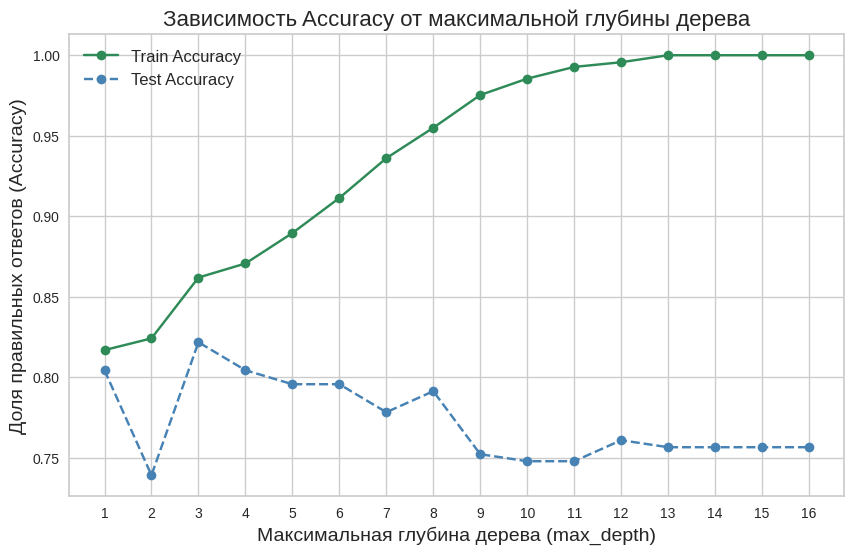

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []

depth_range = range(1, 17)

for max_depth in depth_range:
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    tree_model.fit(X_train_sc, y_train)

    y_train_pred = tree_model.predict(X_train_sc)
    y_test_pred = tree_model.predict(X_test_sc)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label="Train Accuracy", marker='o', linestyle='-', color='seagreen')
plt.plot(depth_range, test_accuracies, label="Test Accuracy", marker='o', linestyle='--', color='steelblue')
plt.title("Зависимость Accuracy от максимальной глубины дерева", fontsize=16)
plt.xlabel("Максимальная глубина дерева (max_depth)", fontsize=14)
plt.ylabel("Доля правильных ответов (Accuracy)", fontsize=14)
plt.xticks(depth_range)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


На графике представлена зависимость точности предсказаний (Accuracy) от максимальной глубины дерева решений (max_depth) для тренировочной и тестовой выборок. Видно, что с увеличением глубины дерева точность на тренировочной выборке неуклонно растет, достигая 100% при глубине 12 и выше. Это указывает на то, что модель с большой глубиной идеально подстраивается под тренировочные данные, полностью запоминая их. Однако такая высокая точность на тренировочной выборке говорит не о качестве модели, а о переобучении: дерево запоминает конкретные случаи вместо выявления закономерностей, что снижает его способность обобщать новые данные.

На тестовой выборке картина другая. В начале, с увеличением глубины, точность на тестовых данных растет, достигая максимума примерно при глубине 3–4. Это свидетельствует о том, что модель на этом этапе наилучшим образом обобщает данные. Однако при дальнейшем увеличении глубины точность на тестовой выборке начинает снижаться или становится нестабильной. Это связано с тем, что слишком сложное дерево, настроенное на особенности тренировочной выборки, начинает плохо справляться с новыми, ранее невиданными данными.

Таким образом, график четко демонстрирует влияние гиперпараметра max_depth на качество работы модели. При малой глубине (1–2) модель страдает от недообучения: она слишком простая и не захватывает важные закономерности данных. При чрезмерной глубине (>8) модель переобучается: она становится слишком сложной и теряет способность адекватно обобщать данные. Оптимальная глубина для этой задачи находится в пределах 3–4, где достигается баланс между точностью на тренировочной и тестовой выборках.

В целом, результаты подчеркивают важность выбора правильной глубины дерева решений для предотвращения как недообучения, так и переобучения. Этот гиперпараметр должен быть тщательно настроен с использованием кросс-валидации, чтобы модель демонстрировала высокую точность и устойчивость к новым данным.